In [1]:
from __future__ import print_function
import torch

In [3]:
a = torch.ones(5)
a


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]

In [6]:
a+1


 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

In [4]:
#autograd

from torch.autograd import Variable

In [15]:

x = Variable(torch.ones(2, 2), requires_grad = True)
y = x + 2
#y.creator

In [16]:
z = y * y * 3

In [17]:
out = z.mean()

In [18]:
out.backward()

In [19]:
x.grad

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]

In [21]:
x = torch.randn(3)
x = Variable(x, requires_grad = True)

In [22]:
y = x * 2
while y.data.norm() < 1000:
    y = y * 2

In [23]:
y

Variable containing:
-489.7006
 -20.8272
-903.5439
[torch.FloatTensor of size 3]

In [24]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

In [25]:
x.grad

Variable containing:
  102.4000
 1024.0000
    0.1024
[torch.FloatTensor of size 3]

In [64]:
# neural networks
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self,channels=3):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(channels, 6, 5) # 1 input image channel, 6 output channels, 5x5 square convolution kernel
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(16*5*5, 120) # an affine operation: y = Wx + b
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) # If the size is a square you can only specify a single number
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:] # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
net

Net (
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)

In [28]:
net

Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)

In [27]:
params = list(net.parameters())
print(len(params))
print(params[0].size()) # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [30]:
input = Variable(torch.randn(1, 1, 32, 32))
out = net(input)
out

Variable containing:
-0.0121 -0.0405  0.0283  0.0297  0.0365  0.0759  0.0865 -0.0221  0.0138 -0.1127
[torch.FloatTensor of size 1x10]

In [52]:
output = net(input)
target = Variable(torch.range(1, 10))  # a dummy target, for example
criterion = nn.MSELoss()
loss = criterion(output, target)
loss

Variable containing:
 37.8725
[torch.FloatTensor of size 1]

In [34]:
print(loss.creator)
print(loss.creator.previous_functions[0][0])

In [35]:
net.zero_grad() # zeroes the gradient buffers of all parameters
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)
loss.backward()
print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
Variable containing:
1.00000e-02 *
  2.9942
 -7.5598
 -6.9169
  2.9478
  2.6935
 -1.6314
[torch.FloatTensor of size 6]



In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [38]:

batch_size = 50
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True)

Processing
Done!


In [39]:
train_loader

In [49]:
output = net(data)

RuntimeError: expected a Variable argument, but got FloatTensor

In [50]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [54]:
import torch.optim as optim
# create your optimizer
optimizer = optim.SGD(net.parameters(), lr = 0.01)

# in your training loop:
optimizer.zero_grad() # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() # Does the update

In [55]:
#load data
import torchvision
import torchvision.transforms as transforms

In [56]:
# The output of torchvision datasets are PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1]
transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                             ])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, 
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, 
                                          shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting tar file
Done!
Files already downloaded and verified


In [60]:
%matplotlib inline

In [61]:

# functions to show an image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

 ship   car horse  frog


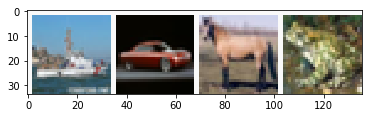

In [62]:
# show some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s'%classes[labels[j]] for j in range(4)))

In [63]:
criterion = nn.CrossEntropyLoss() # use a Classification Cross-Entropy loss
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [68]:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool  = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(16*5*5, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net().cuda()

In [77]:
trainloader.dataset

In [78]:
for epoch in range(2): # loop over the dataset multiple times
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        
        # wrap them in Variable
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()        
        optimizer.step()
        
        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999: # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.304
[1,  4000] loss: 2.304
[1,  6000] loss: 2.303
[1,  8000] loss: 2.303
[1, 10000] loss: 2.305
[1, 12000] loss: 2.305
[2,  2000] loss: 2.304
[2,  4000] loss: 2.304
[2,  6000] loss: 2.303
[2,  8000] loss: 2.305
[2, 10000] loss: 2.303
[2, 12000] loss: 2.304
Finished Training


GroundTruth:    cat  ship  ship plane


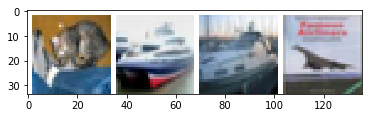

In [66]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s'%classes[labels[j]] for j in range(4)))

In [67]:

outputs = net(Variable(images))

# the outputs are energies for the 10 classes. 
# Higher the energy for a class, the more the network 
# thinks that the image is of the particular class

# So, let's get the index of the highest energy
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s'% classes[predicted[j][0]] for j in range(4)))

Predicted:   bird  bird  bird  bird
